# Fakultät für Physik

## Physikalisches Praktikum P2 für Studierende der Physik

Versuch P2-53, 54, 55 (Stand: März 2024)

[Raum F1-13](https://labs.physik.kit.edu/img/Praktikum/Lageplan_P2.png)



# Franck-Hertz-Versuch

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
\end{split}
\end{equation*}

Name: __________________ Vorname: __________________ E-Mail: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Gruppennummer: _____

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}


Betreuer: __________________

\begin{equation*}
\begin{split}
&\\
&\\
&\\
\end{split}
\end{equation*}

Versuch durchgeführt am: __________________

---

**Beanstandungen:**

\begin{equation*}
\begin{split}
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
&\\
\end{split}
%\text{\vspace{10cm}}
\end{equation*}

<br>
Testiert am: __________________ Testat: __________________

# Durchführung

**Die Anleitung zu diesem Versuch finden Sie [hier](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/README.md).**

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import kafe2
import uncertainties as u 
import uncertainties.unumpy as unp


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import kafe2
from uncertainties import ufloat

def converter(path):
    df = pd.read_csv(path,delimiter=';').drop(columns=['Frequenz'])
    df = df.applymap(lambda x: np.nan if x =='∞' else float(x.replace(',','.')))
    groupedB = df.groupby(df['Kanal B']).agg(['mean','std'])
    groupedA = df.groupby(df['Kanal A']).agg(['mean','std'])
    x_err = np.mean(np.gradient(groupedB['Kanal A'].index)[2:10])/2
    y_err = np.mean(np.gradient(groupedA['Kanal B'].index)[2:10])/2
    return (groupedB['Kanal A'],x_err,y_err)

## Aufgabe 1: Messanordnung

**Hinweise zu Aufgabe 1 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

 - Bauen Sie die Schaltung der Franck-Hertz-$\mathrm{Hg}$-Röhre mit dem zugehörigen Betriebsgerät auf. 
 - Machen Sie sich mit dem Versuchsaufbau vertraut, indem Sie die folgenden Aufgaben bearbieten.

---

### Aufgabe 1.1: Beschreibung der Messanordnung

 * Beschreiben Sie die Messanordnung, die Sie für diesen Versuch vorfinden in eigenen Worten.

---

Eine evakuierte Glasröhre befindet sich in einem Ofen. In der Röhre befindet sich ein Quecksilbertropfen, durch heizen kann so der Druck des Quecksilbergases erhöht und so die mittlere freie Weglänge $\lambda$ verringert werden. In der Röhre befindet sich eine beschichtete Glühkathode. Die Glühkathode wird elektrisch beheizt, um Elektronen zu emittieren. Diese Elektronen werden durch thermionische Emission freigesetzt. Diese werden durch $U_1$ an einem grobmaschigen Raumladungsgitter vorbeschleunigt um Raumladungseffekten vorzubeugen und mit $U_2$ durch das Beschleunigungsgitter beschleunigt. Hinter diesem Gitter liegt die Anode mit der sich der Strom messen lässt. An dieser wird eine kleine Gegenspannung $U_3$ angelegt um nur Elektronen mit ausreichender Energie zu messen.

### Aufgabe 1.2: Effekt der Steuerparameter an der Röhre

 * Beschreiben Sie in eigenen Worten die Effekte, die einzelne Variationen der Parameter $\vartheta$, $U_{1}$, $U_{2}$ und $U_{3}$ auf $I_{A}$ haben. 
 * Nehmen Sie für $\theta=180,\,160,\,140,\,120^{\circ}\,\mathrm{C}$ jeweils einen Verlauf von $I_{A}$ als Funktion von $U_{2}$, für entsprechend optimierte Werte von $U_{1}$ und $U_{3}$, auf und fügen Sie Ihrem Protokoll eine entsprechende Darstellungen bei. Notieren Sie zu jeder Darstellug die verwendeten Werte von $U_{1}$ und $U_{3}$. 
 * Beschrieben Sie den Kurvenverlauf und die entsprechenden Änderungen qualitativ.

---

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

## Aufgabe 2: Charakterisierung der $\mathrm{Hg}$-Röhre

**Hinweise zu Aufgabe 2 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Charakterisieren Sie die Röhre, für die Einstellungen von $\vartheta$, $U_{1}$ und $U_{3}$ aus **Aufgabe 1.2**, die Ihnen dafür am besten geeignet erscheinen. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 2.1: Bestimmung der Spannungsdifferenz $\Delta U_{B}$ und der effektiven Kontaktspannung $U_{\mathrm{th.}}$

 * Bestimmen Sie die Spannungsdifferenz $\Delta U_{B}$ mit Hilfe der beobachteten Maxima und/oder Minima des Verlaufs von $I_{A}$.
 * Bestimmen Sie die effektive Kontaktspannung $U_{\mathrm{th.}}$.
 * Kalibrieren Sie für Ihre spätere Auswertung die $x$-Achse **aller aufgezeichneten Diagramme** entsprechend, so dass dort $U_{B}$ angezeigt wird.

---

Mo31/t121° U1 0.63 U3 1.05 Uk 4.51.csv


c:\Users\jonah\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\jonah\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


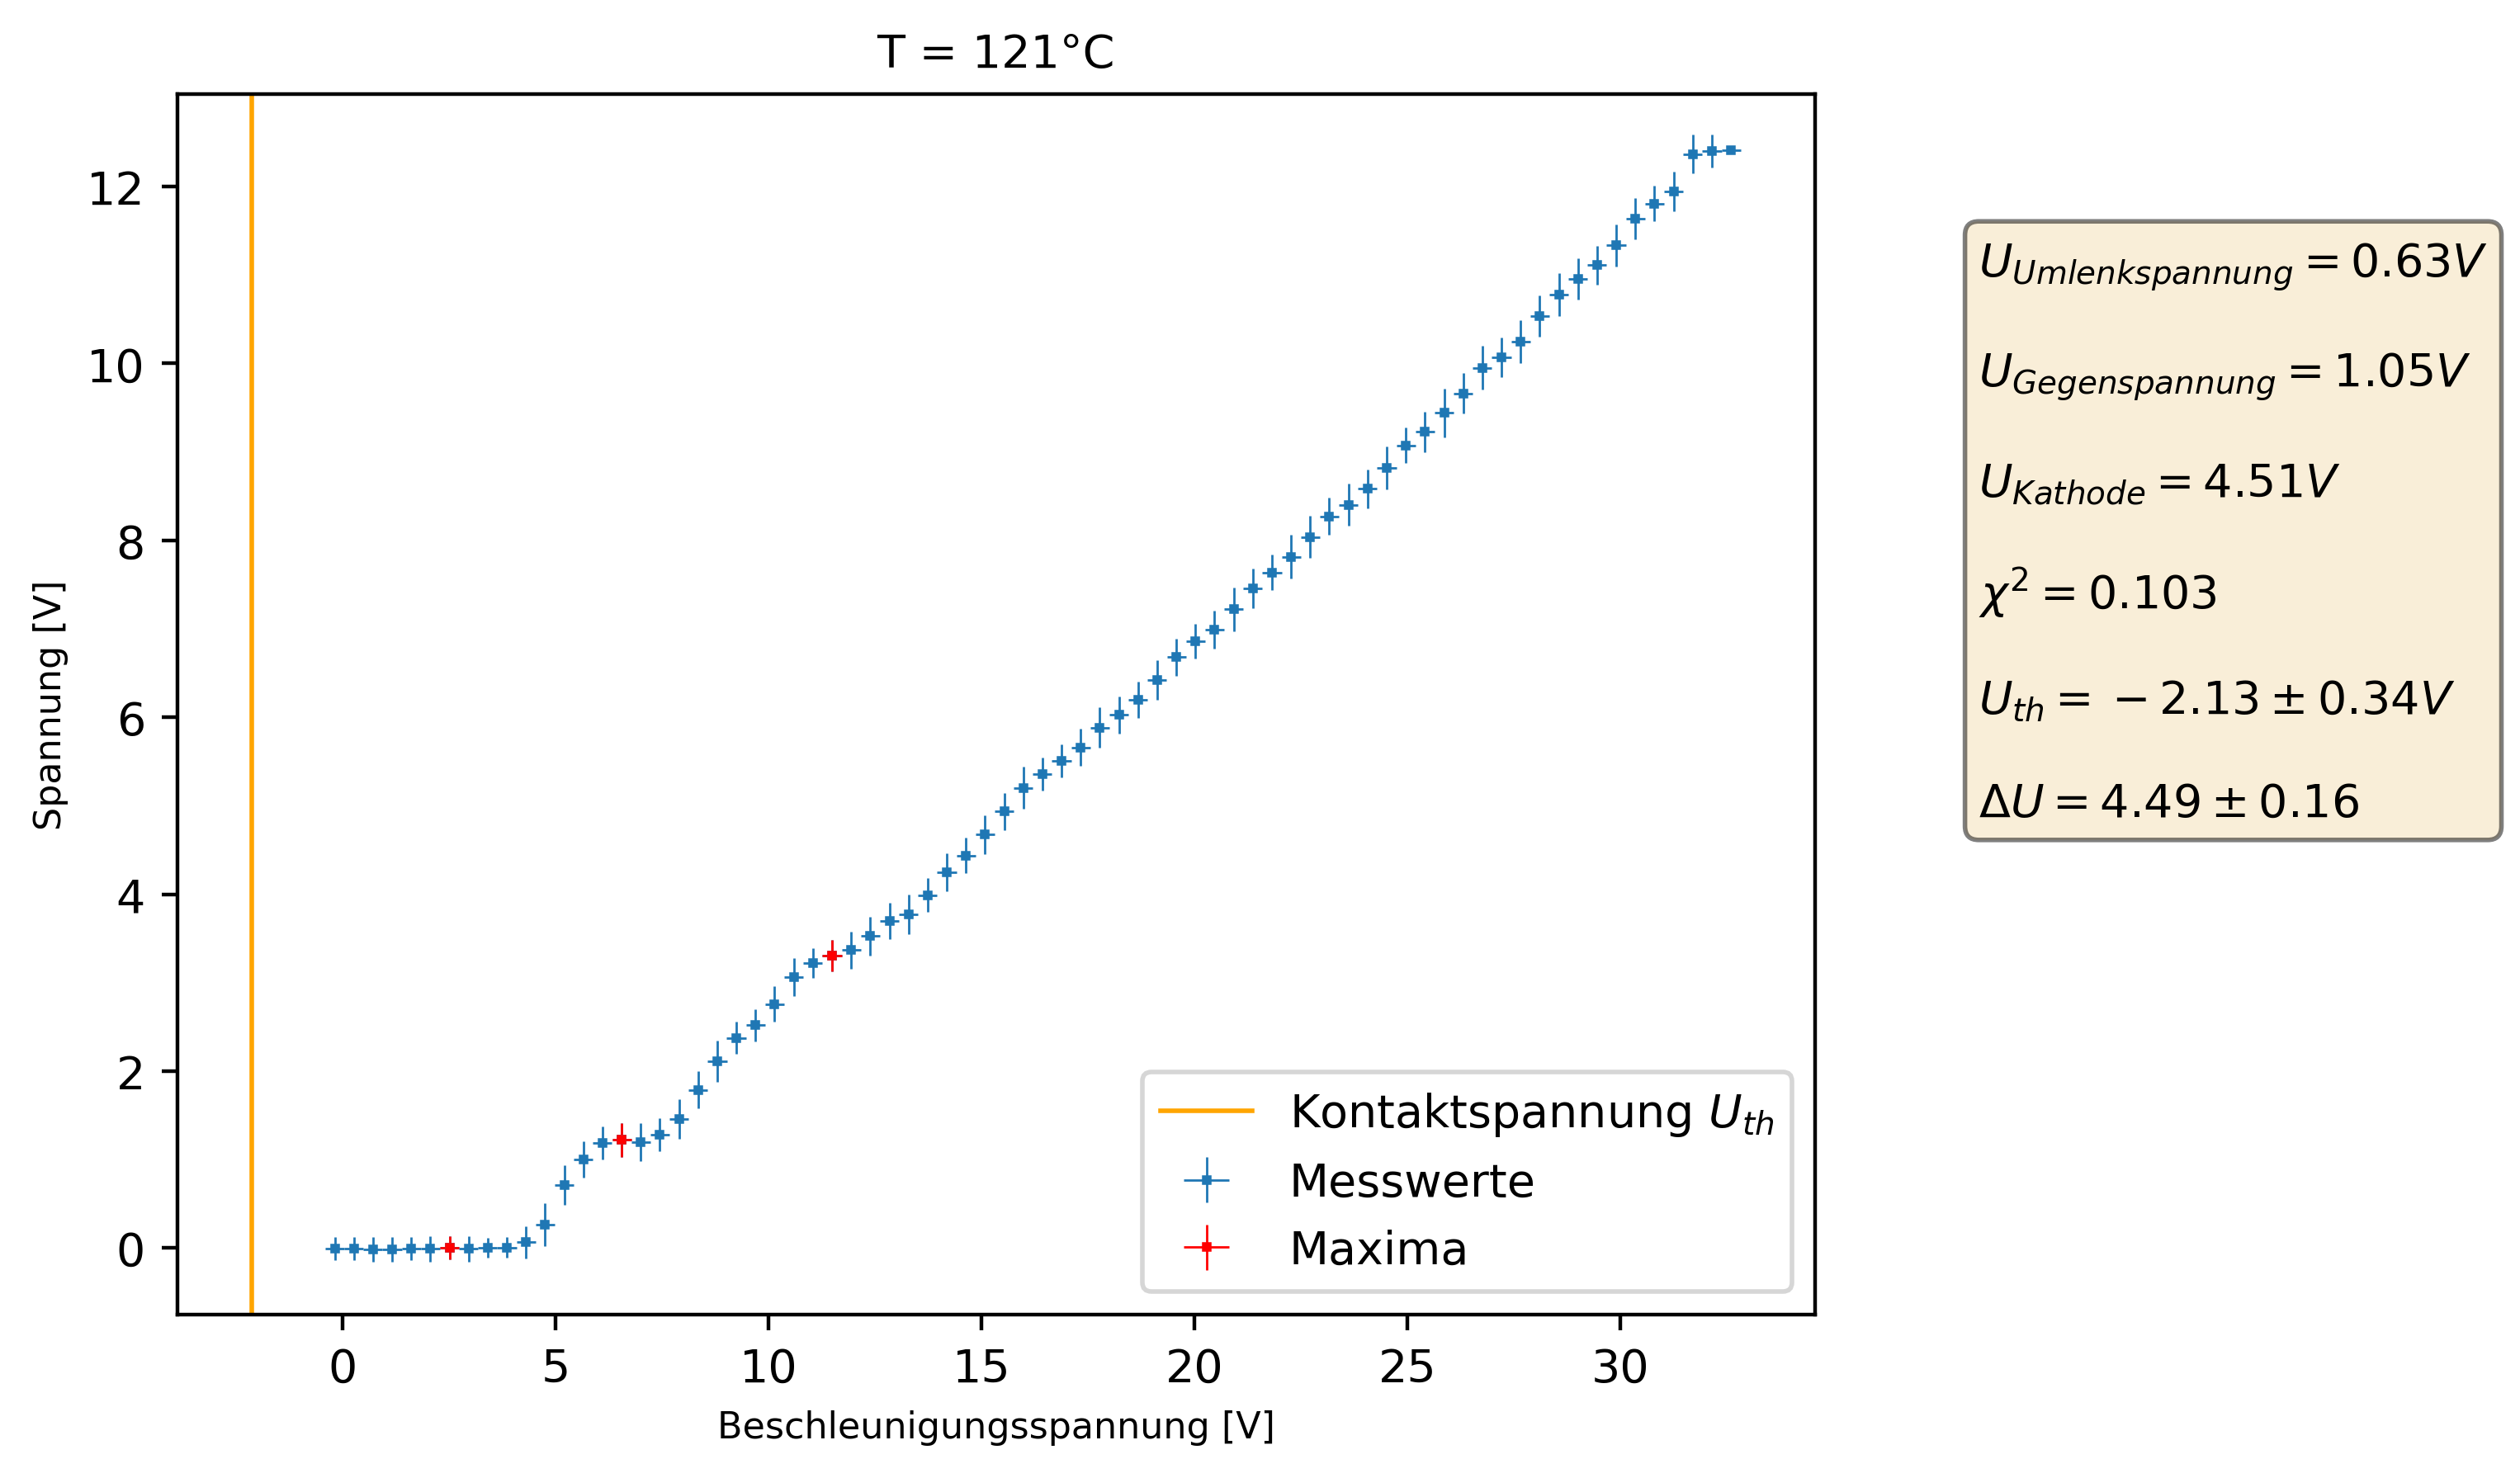

Mo31/t140° U1 2.3 U3 3.15 Uk 3.75.csv


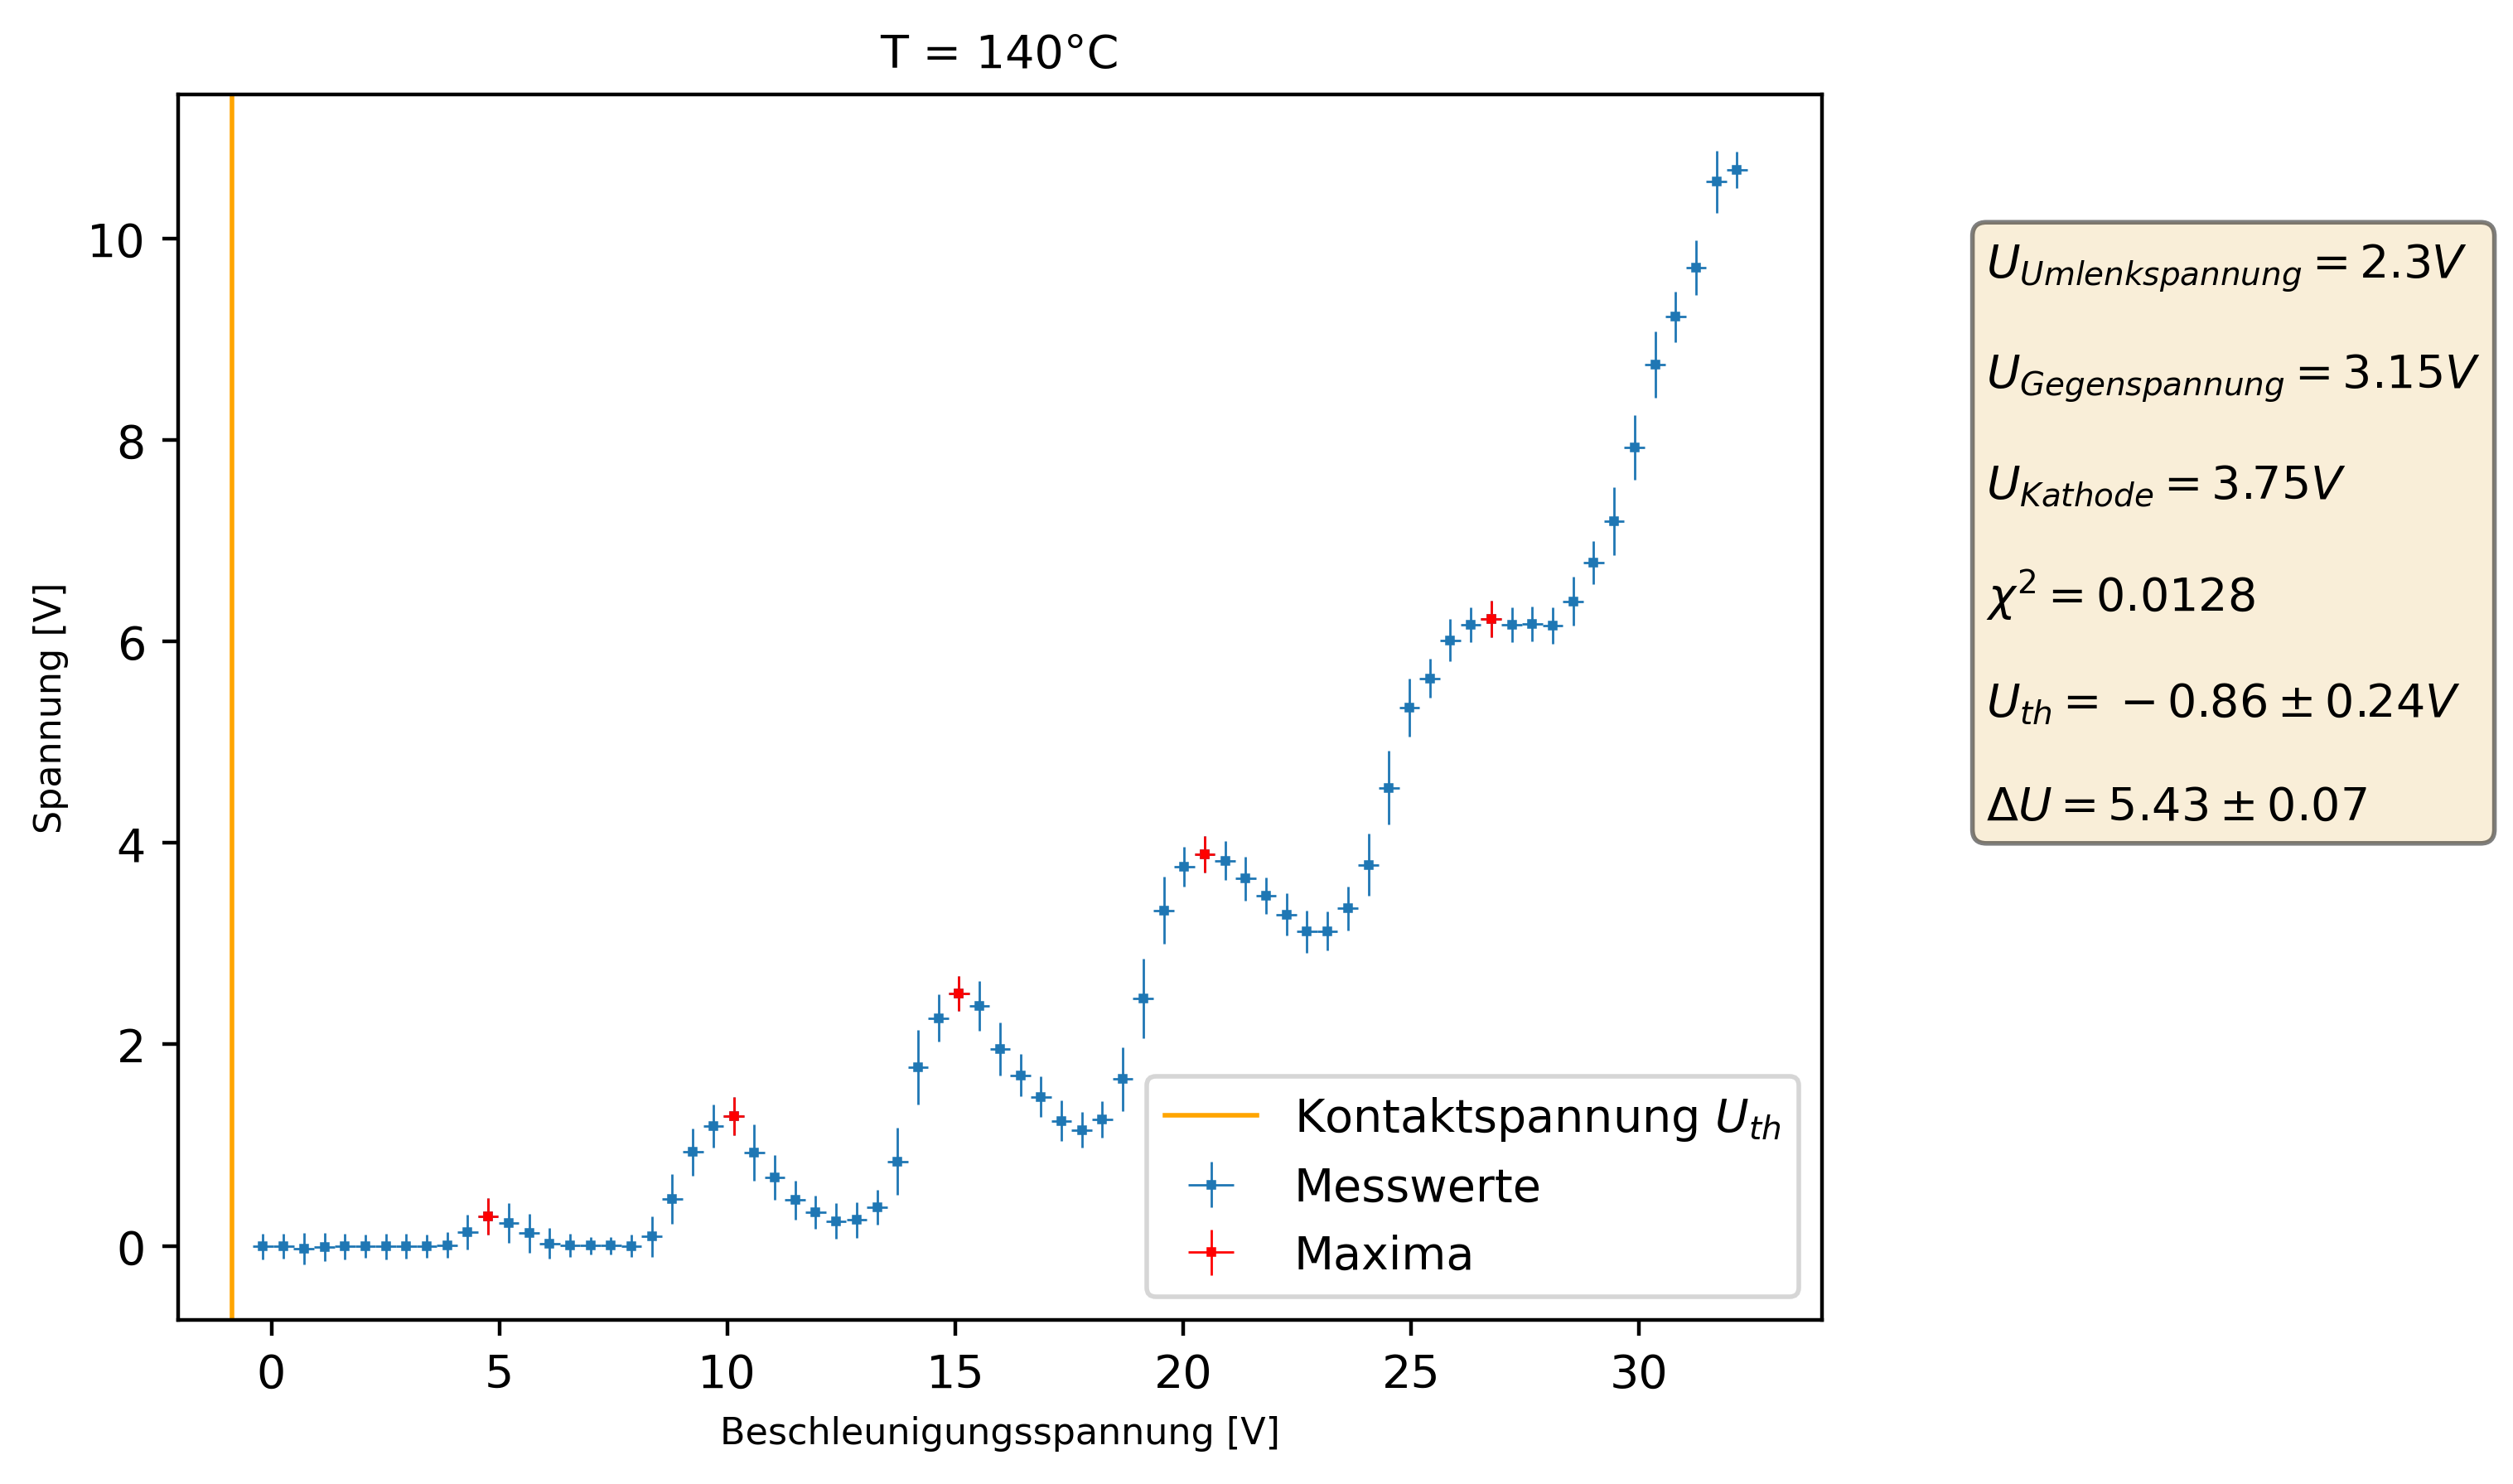

Mo31/t161° U1 2.69 U3 3.16 Uk 4.49.csv


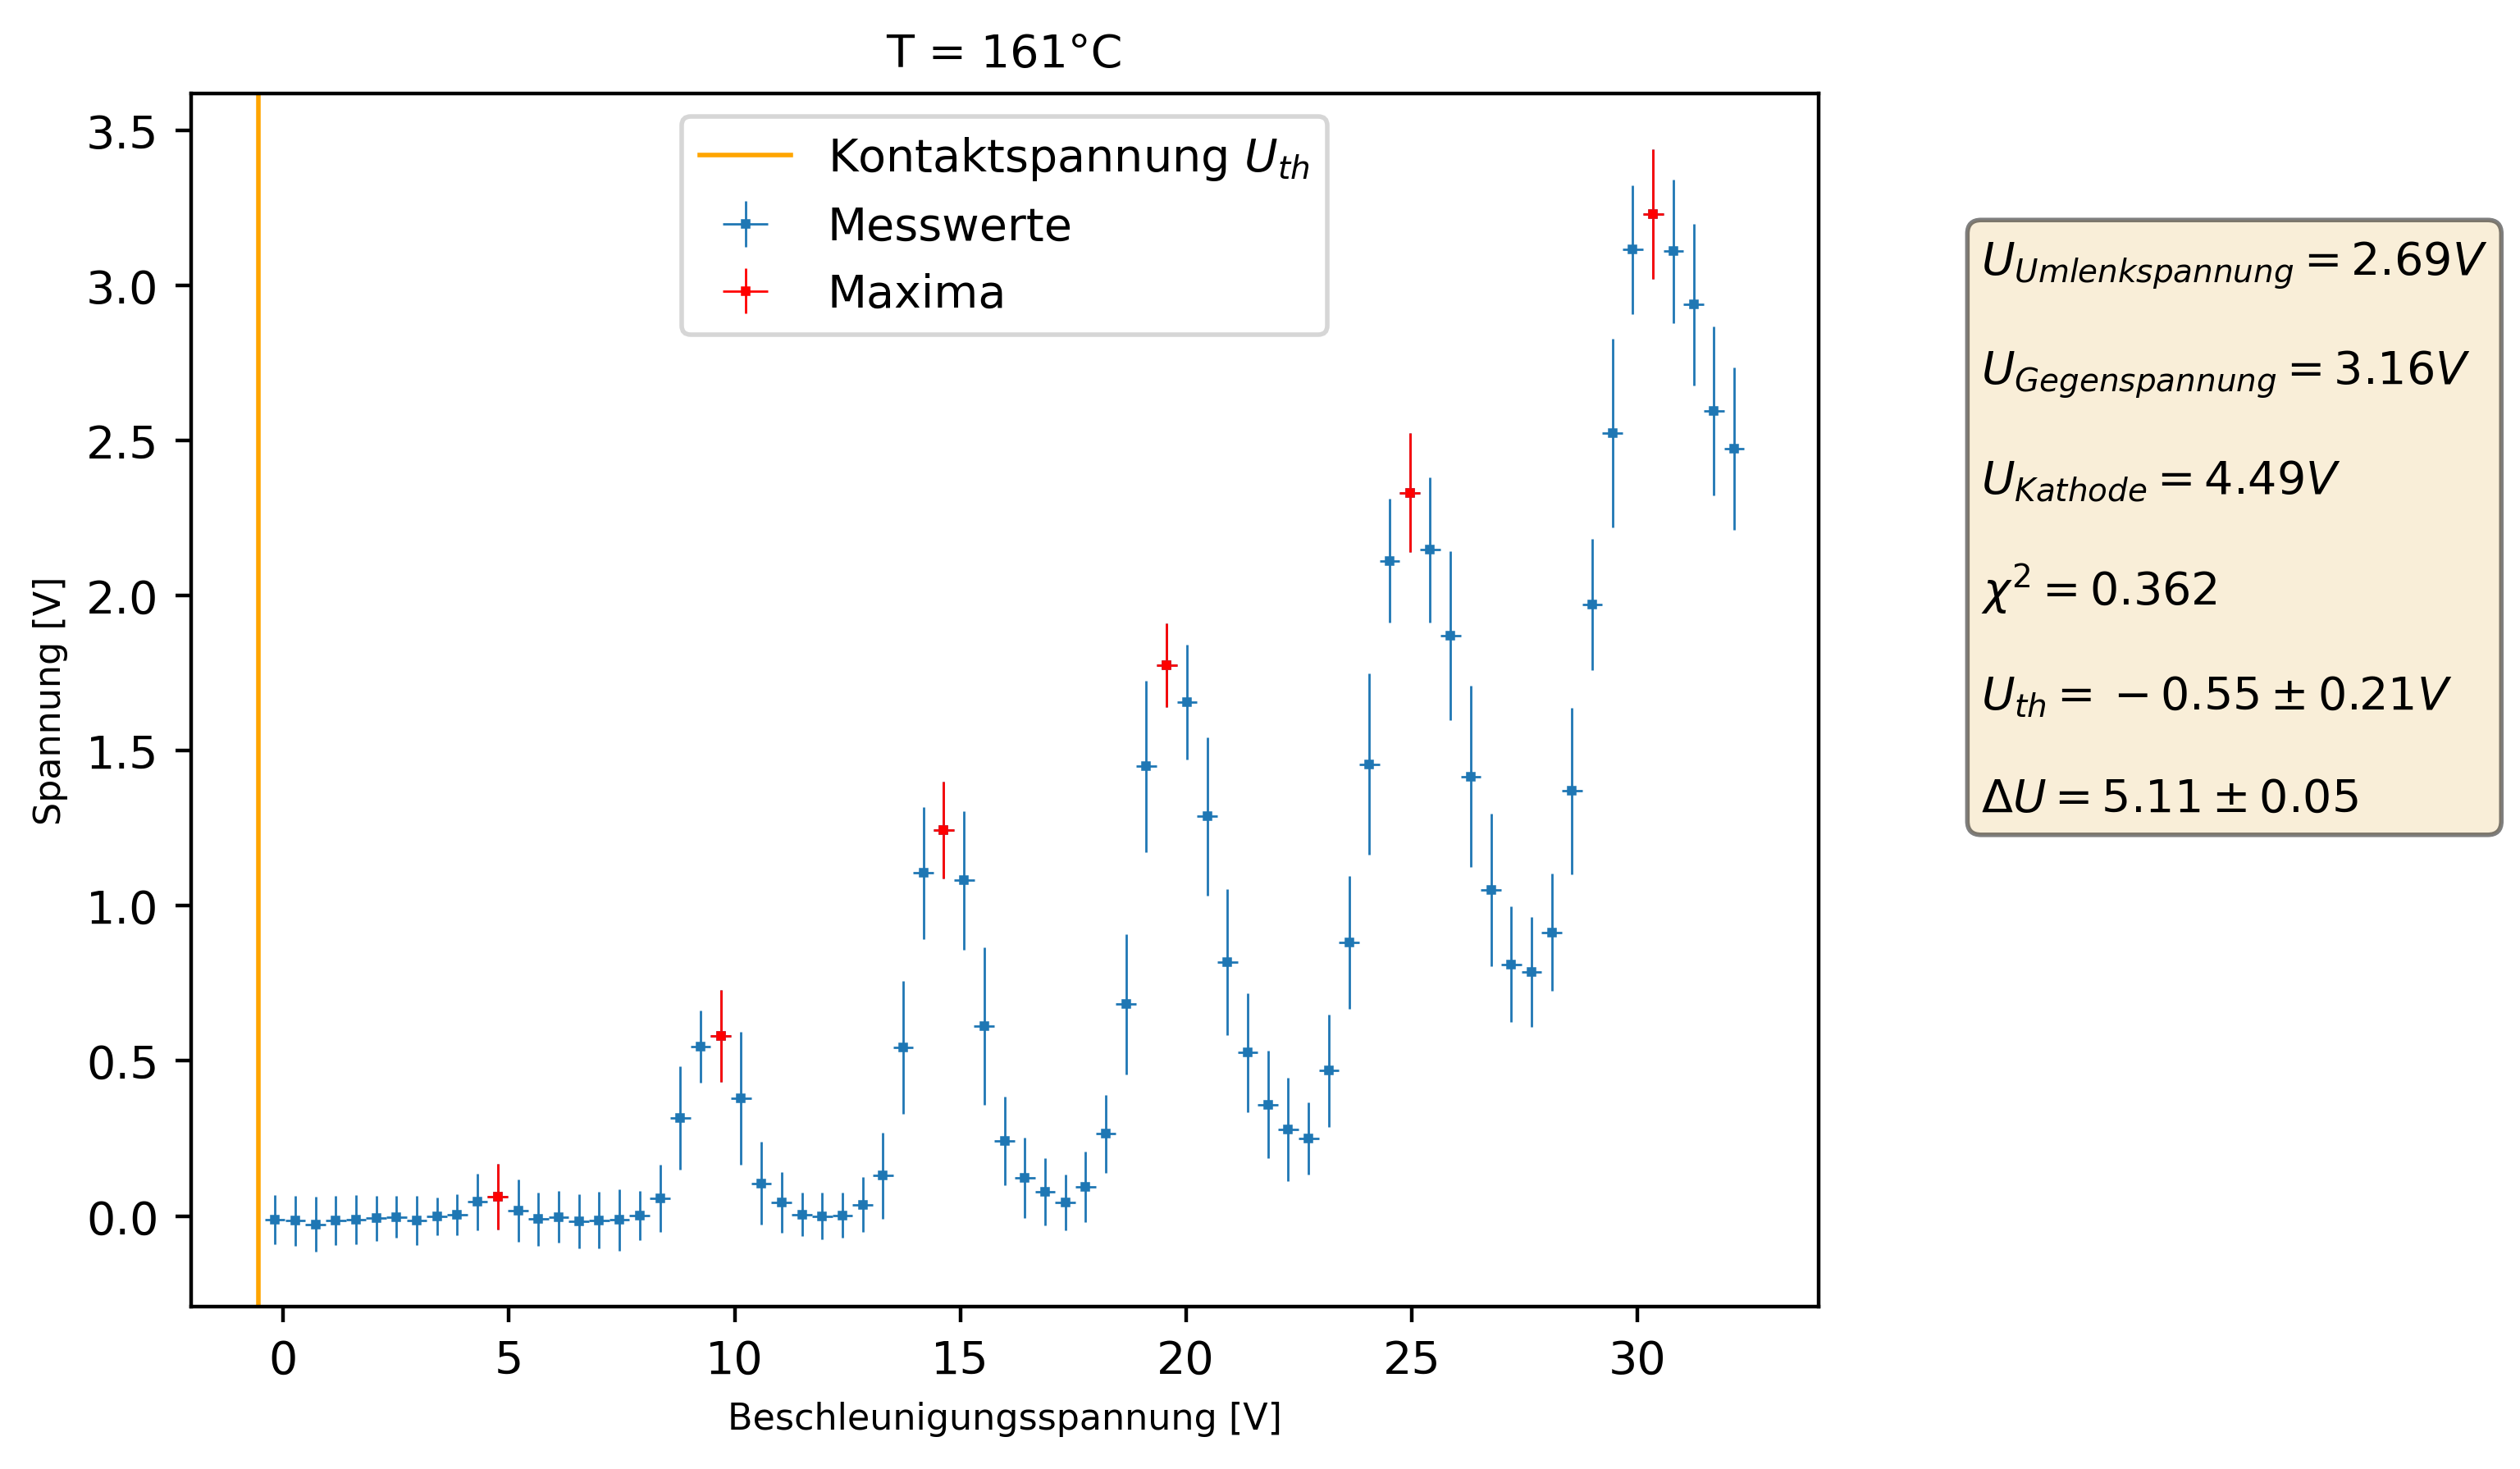

Mo31/t182° U1 5.26 U3 3.15 Uk 4.44.csv


c:\Users\jonah\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\jonah\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


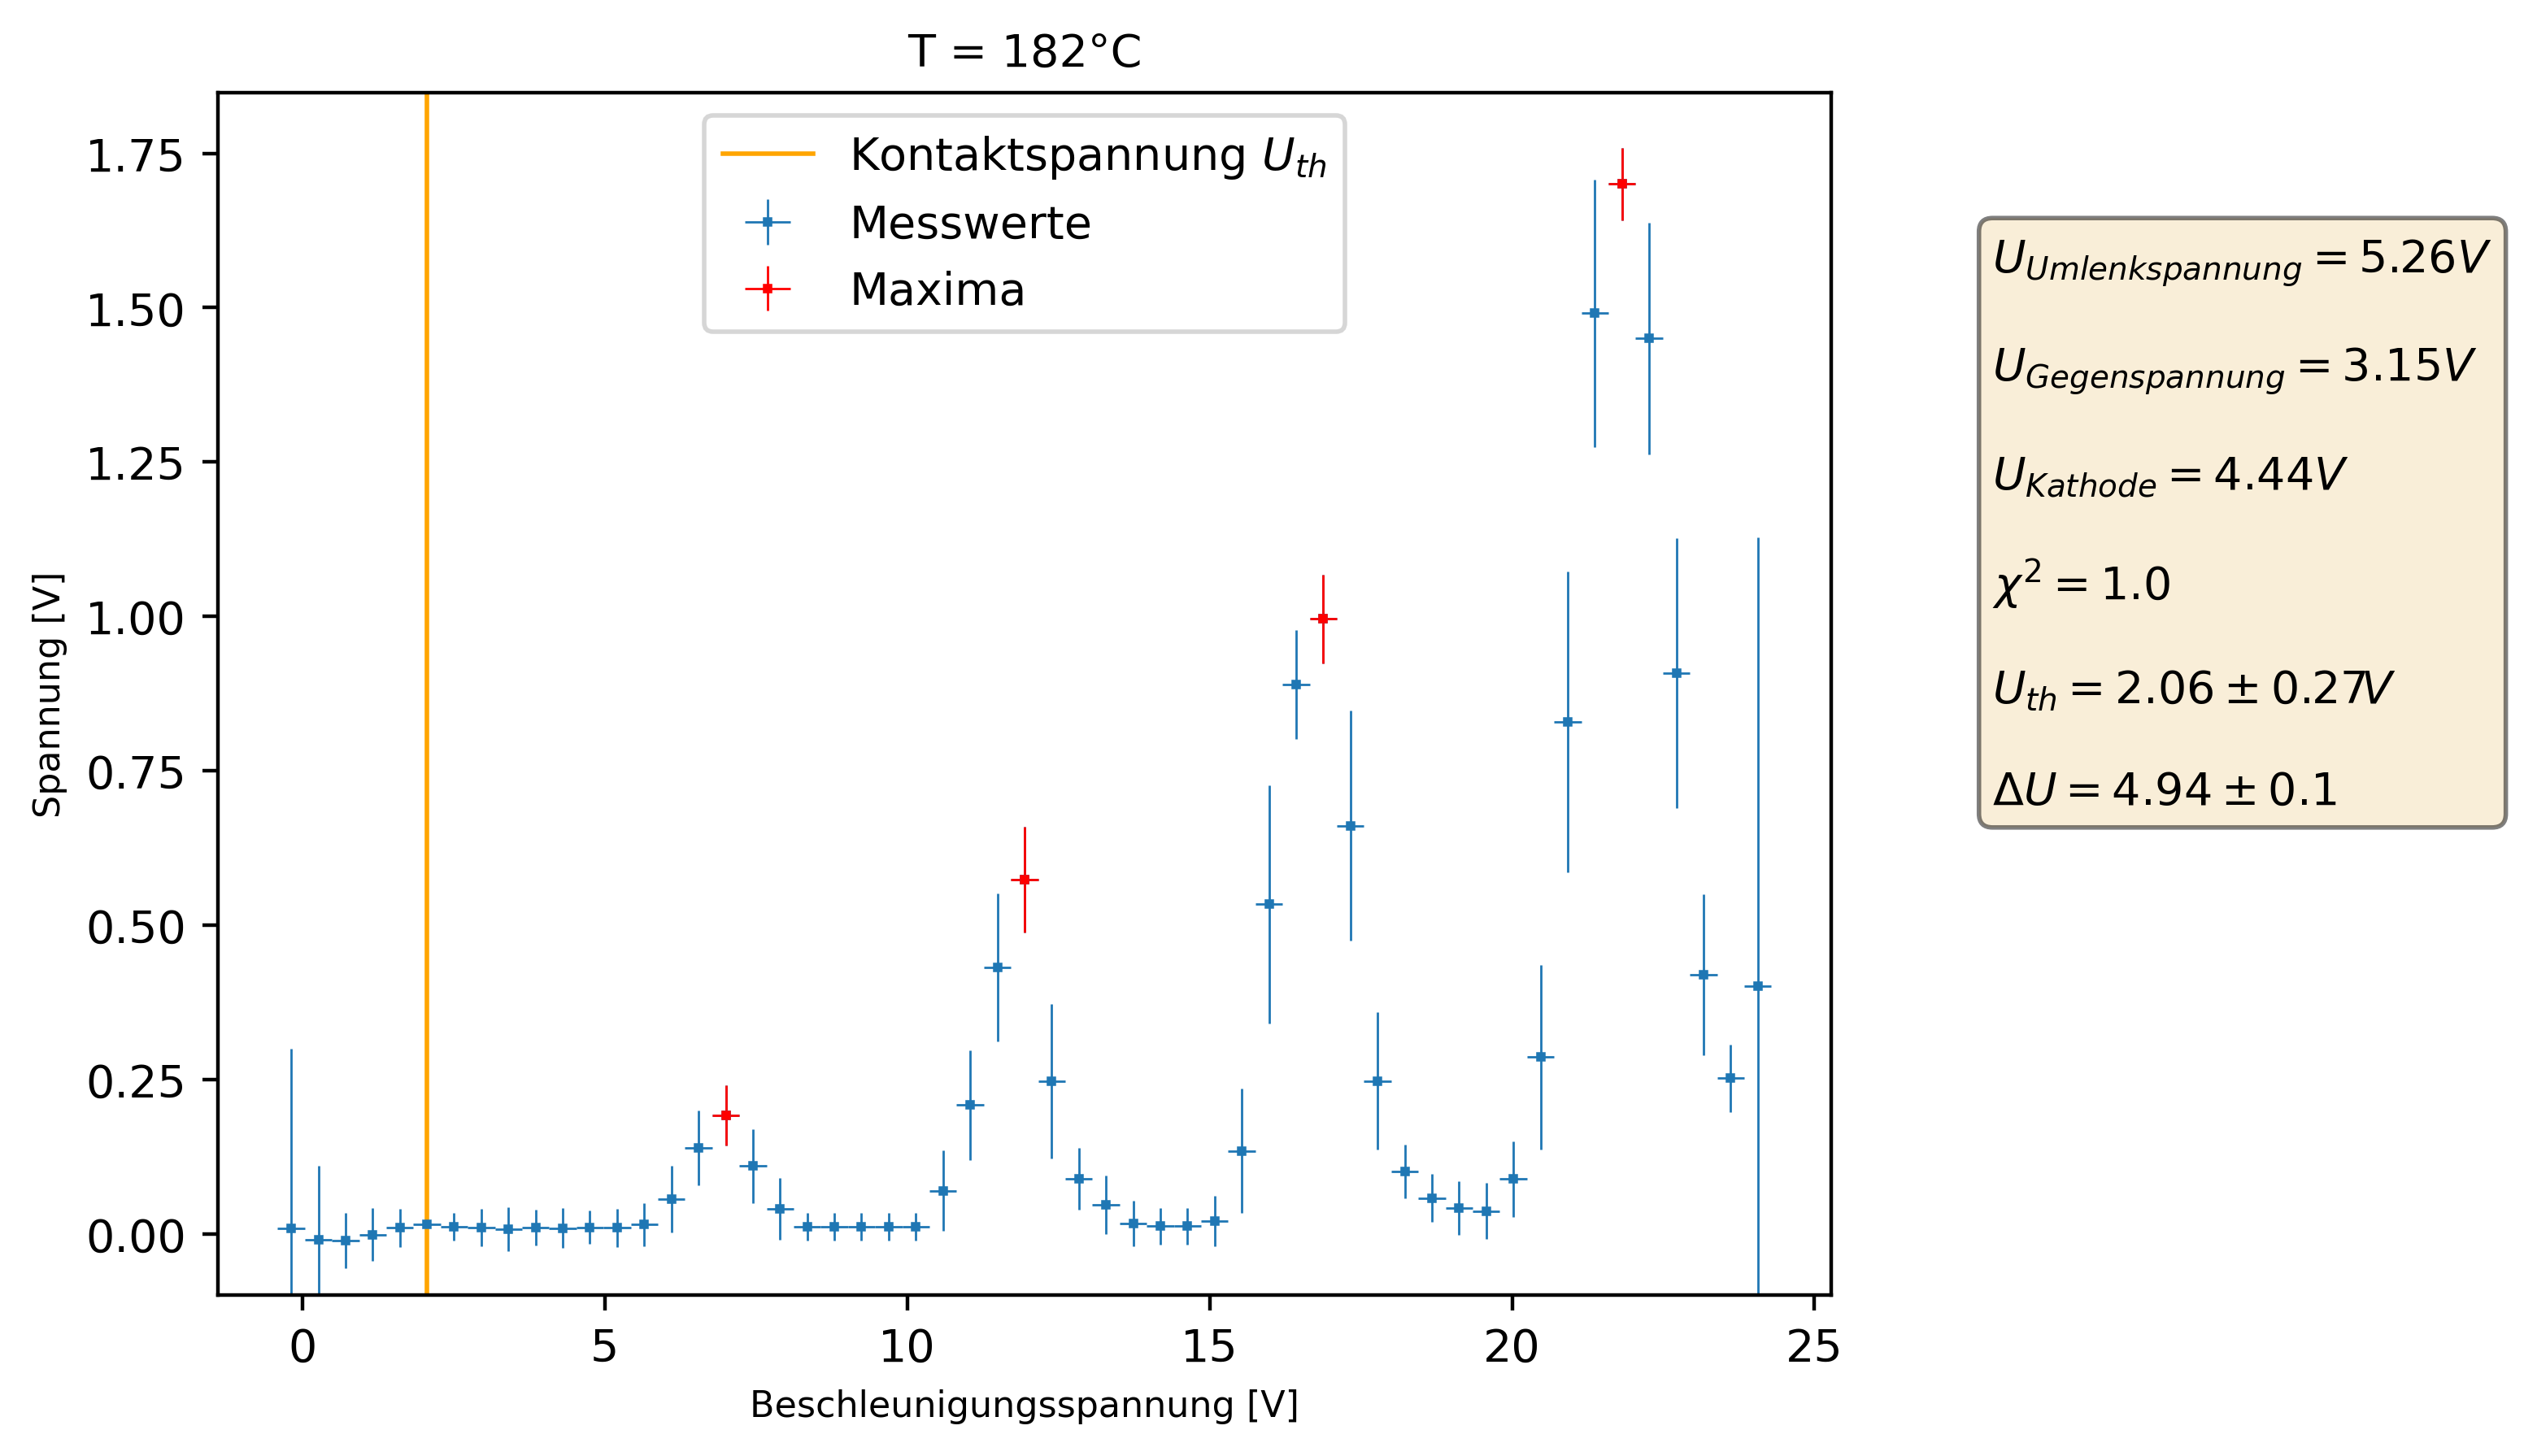

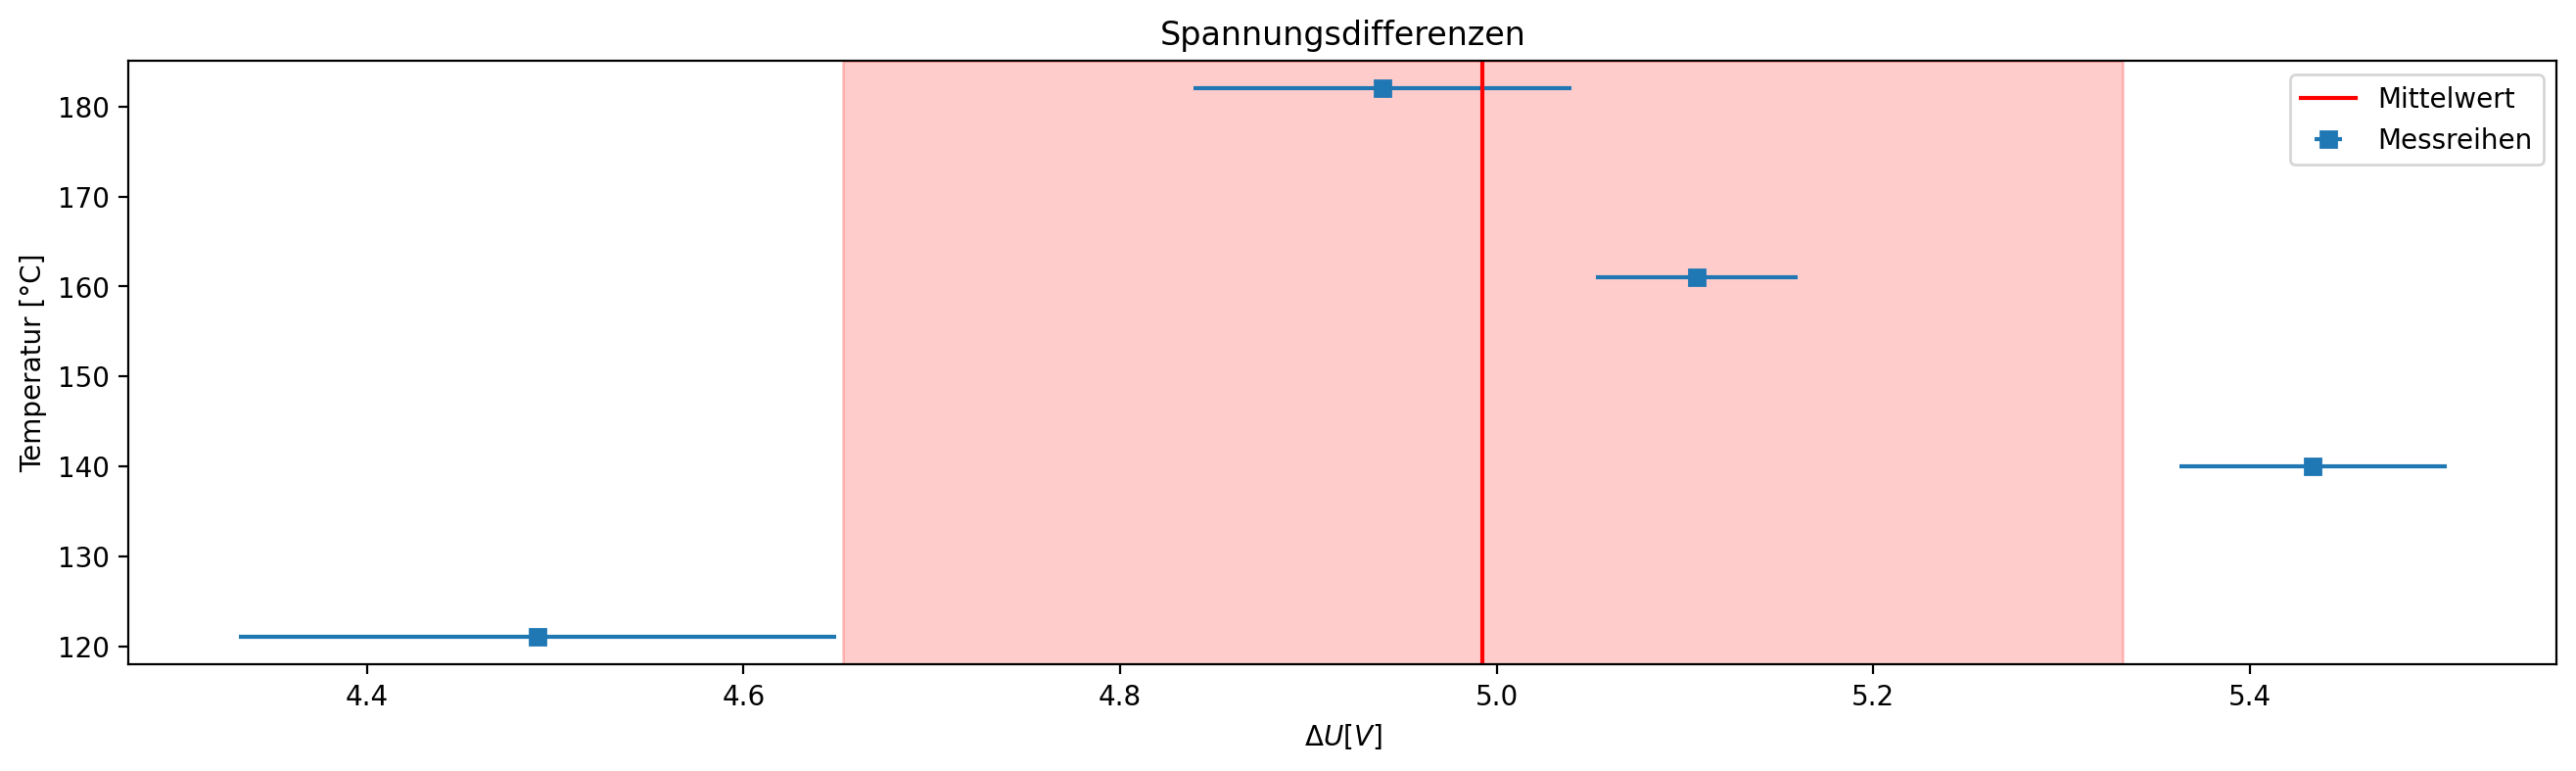

In [3]:
paths = ['Mo31/t121° U1 0.63 U3 1.05 Uk 4.51.csv','Mo31/t140° U1 2.3 U3 3.15 Uk 3.75.csv','Mo31/t161° U1 2.69 U3 3.16 Uk 4.49.csv','Mo31/t182° U1 5.26 U3 3.15 Uk 4.44.csv']


frames,temps,dUs = [[],[],[]]
for path in paths:
    print(path)
    data,xerr,yerr = converter(path)
    data['std'] = data['std']+yerr

    plt.errorbar(data.index,data['mean'],yerr=data['std'],xerr=xerr,fmt='s',lw=0.5,markersize=1,label='Messwerte')
    temp = path.split('/t')[1].split('°')[0]
    plt.title('T = '+temp+'°C',fontsize=10)
    plt.ylabel('Spannung [V]',fontsize=8)
    plt.xlabel('Beschleunigungsspannung [V]',fontsize=8)
    
    peaks = list(find_peaks(np.array(data['mean']),threshold=0.01)[0])
    if '121°' in path:
        peaks.append(26)
    maximas = data.iloc[peaks]
    plt.errorbar(maximas.index,maximas['mean'],yerr=maximas['std'],xerr=xerr,fmt='s',lw=0.5,markersize=1,color='red',label='Maxima')
    
    fit = kafe2.xy_fit(x_data=np.arange(1,len(maximas.index)+1),y_data=maximas.index,y_error=xerr)

    plt.gcf().set_dpi(400)
    
    ax = plt.gca()
    axpos = ax.get_position()
    props = dict(boxstyle='round',facecolor='wheat', alpha=0.5)
    s = path.split(' ')
    chi2,Uth,Utherr = (fit['chi2_probability'],fit['parameter_values']['b'],fit['parameter_errors']['b'])
    plt.axvline(Uth,lw=1,color='orange',label='Kontaktspannung $U_{th}$')
    dU = (fit['parameter_values']['a'],fit['parameter_errors']['a'])
    textstr = '\n\n'.join(('$U_{Umlenkspannung}='+s[2]+'V$','$U_{Gegenspannung}='+s[4]+'V$','$U_{Kathode}='+s[6].split('.csv')[0]+'V$',
                          r'$\chi^2 = {}$'.format(f'{chi2:.3}'),'$U_{th}='+str(round(Uth,2))+'\pm'+str(round(Utherr,2))+'V$',
                          '$\Delta U = '+str(round(dU[0],2))+'\pm'+str(round(dU[1],2))+'$'))
        
    ax.text(axpos.x1 + 0.2, axpos.y1, textstr, transform=ax.transAxes, fontsize=10,
    verticalalignment='top', bbox=props)
    
    plt.legend()
    plt.show()
    data.index = data.index-Uth
    frames.append(data)
    dUs.append(dU)
    temps.append(float(temp))
    
dUs = np.array(dUs)
fig, ax = plt.subplots(figsize=(16, 4))
ax.errorbar(dUs[:,0],temps,xerr=dUs[:,1],fmt='s',label='Messreihen')
ax.set_ylabel('Temperatur [°C]')
ax.set_xlabel('$\Delta U [V]$')
ax.set_title('Spannungsdifferenzen')
mittel,abweichung = (np.mean(dUs[:,0]),np.std(dUs[:,0]))
ax.axvline(mittel,color='red',label='Mittelwert')
ax.axvspan(mittel-abweichung,mittel+abweichung,alpha = 0.2,color='red')
plt.legend()
plt.gcf().set_dpi(200)

**Lösung:**

*Fügen Sie Ihre Lösung zu dieser Aufgabe hier ein. Löschen Sie hierzu diesen kursiv gestellten Text aus dem Dokument. Um Code-Fragmente und Skripte in [Python](https://www.python.org/), sowie ggf. bildliche Darstellungen direkt ins [Jupyter notebook](https://jupyter.org/) einzubinden fügen Sie dem notebook eine Code-Zelle zu.* 

---

### Aufgabe 2.2: Verlauf des Anodenstroms $I_{\mathrm{G2}}$

 * Bestimmen Sie den Anodenstrom $I_{G2}$ als Funktion von $U_{2}$. 
 * Überprüfen Sie durch geeignete Auftragung die aus dem [Raumladungsgesetz](https://de.wikipedia.org/wiki/Raumladungsgesetz) erwartete Abhängigkeit von $U_{2}$.

---

Im Versuch wird das Schottky-Langmuirsche-Raumladungsgesetz untersucht. Laut Hinweisen soll dazu $U_1$ und $U_3$ auf null gesetzt werden. Bei der Versuchsdurchführung zeigt sich jedoch, dass sich so kein Strom einstellt. Deswegen wird die Spannung $U_1$ auf $1.21\,V$ gesetzt. Der Versuch wird bei $t=120°C$ durchgeführt. Für die Unsicherheit auf die Spannungsmessung wird $0.05\,V$ und für die Strommessung $0.03\,A$ angenommen. 

C:\Users\jonah\AppData\Local\Temp\ipykernel_14196\3393186976.py:3: RuntimeWarning: invalid value encountered in power
  return kappa*(U2+U_th)**gamma


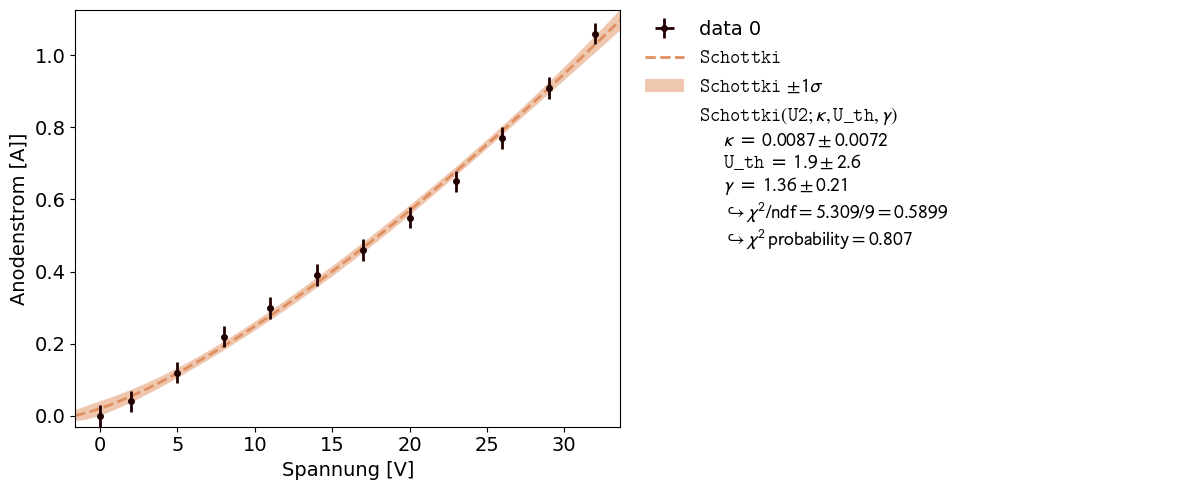

In [4]:
arr = np.array([[32.0, 1.06],[29.0, 0.91],[26.0, 0.77], [23.0, 0.65], [20.0, 0.55], [17.0, 0.46], [14.0, 0.39], [11.0, 0.30], [8.0, 0.22], [5.0, 0.12], [2.0, 0.04], [0,0]])  
def Schottki(U2, kappa, U_th, gamma=3/2):
    return kappa*(U2+U_th)**gamma

Schottki_cont = kafe2.XYContainer(arr[:,0],arr[:,1])
Schottki_cont.add_error('x', 0.05)
Schottki_cont.add_error('y',0.03)

Schottki_fit = kafe2.Fit(Schottki_cont,Schottki)
Schottki_fit.do_fit()


Schottki_plot = kafe2.Plot(Schottki_fit)
Schottki_plot.y_label = 'Anodenstrom [A]]'
Schottki_plot.x_label ='Spannung [V]' 
Schottki_plot.plot()

plt.show();

Der Fit ergibt $\gamma = 1.36\pm0.21$ der Theoretische Wert liegt bei $\gamma_{\rm{lit}}=1.5$ und liegt somit im Bereich der Messunsicherheit. Da das Schottky-Langmuirsche-Raumladungsgesetz nur für evakuierte Röhren gilt und in diesem Fall also nur annähernd lassen sich so die Abweichungen erklären. $U_{\rm{th}}=1.9\pm2.6$ ist mit einer sehr großen Unsicherheit behaftet und so kaum aussagekräftig. Der Fit ist mit $\frac{\chi^2}{ndf}=0.5899$ und mit einer $\chi^2\rm{-Wahrscheinlichkeit}=0.807$ gut. 

## Aufgabe 3: Höhere Anregungen von $\mathrm{Hg}$

**Hinweise zu Aufgabe 3 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Untersuchen Sie höhere Anregungen von $\mathrm{Hg}$ und schätzen Sie seine Ionisierungsenergie ab. Bearbeiten Sie hierzu die folgenden Aufgaben.

---

### Aufgabe 3.1: Beobachtung höherer Anregungen von $\mathrm{Hg}$

 * Bestimmen Sie den Verlauf von $I_{A}$ als Funktion von $U_{B}$ unter Betriebsbedingungen, die für die Erzeugung höherer Anregungszustände in $\mathrm{Hg}$ geeignet sind. 
 * Versuchen Sie im Rahmen Ihrer Auswertung soviele Strukturen im Verlauf von $I_{A}$ wie möglich zu identifizieren. Dieser wird im Wesentlichen durch Linearkombinationen der beiden niedrigsten Anregungsenergien bestimmt.

---

Da die sich keine Kurve einstellen ließ, wurden die Daten einer anderen Gruppe verwendet.

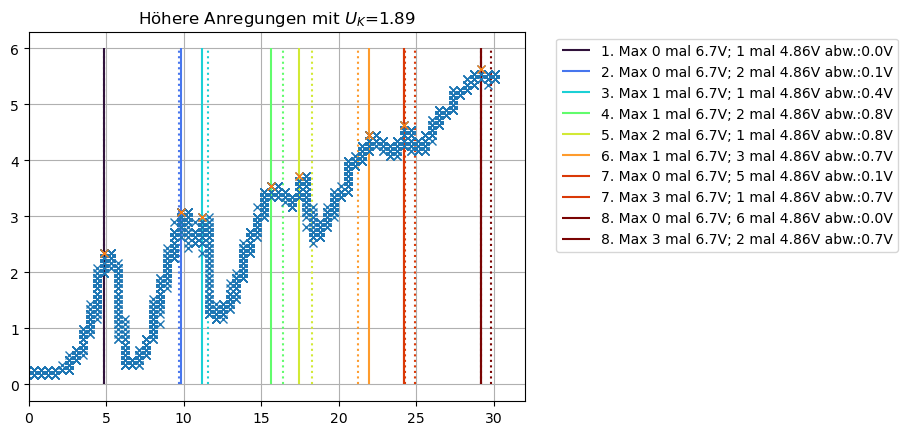

In [5]:
arr3 = pd.read_csv("A3 höhere Energieniveaus Hg.csv",delimiter=';',decimal=",").drop(columns=['Frequenz'])
peaks = find_peaks(arr3["Kanal A"],height=1,width=20,distance=100)[0]




n=np.array(range(1,10))
U_k = arr3["Kanal B"][peaks[0]]-4.86


anr1=arr3["Kanal B"][peaks[[0,1,3,5,7]]]-U_k
anr2= arr3["Kanal B"][peaks[[2,4,6]]]-U_k
anr= np.array(arr3["Kanal B"][peaks])-U_k

for v in range(0,len(anr)):
    colors=plt.cm.get_cmap("turbo",len(anr))
    an=anr[v]

    mini=[10,0,0]
    for i in range(0, 6):
      for j in range(0, 8):
          wert = i*6.7+j*4.86
          if abs(an-wert)<1 :
            mini=[abs(an-wert),i,j]
            plt.vlines(i*6.7+j*4.86,0,6,colors=colors(v),linestyles="dotted")

            plt.vlines(an,0,6,label=str(v+1)+". Max "+str(i)+" mal 6.7V; "+str(j)+" mal 4.86V"+" abw.:"+str(np.round(abs(an-wert),1))+"V",colors=colors(v))

    #plt.vlines(an,0,6,label=str(mini[1])+":6.7V;"+str(mini[2])+":4.86V",colors=colors(v))


plt.plot(arr3["Kanal B"][1:]-U_k,arr3["Kanal A"][1:],"x")
plt.plot(arr3["Kanal B"][peaks]-U_k,arr3["Kanal A"][peaks],"x")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
arr3["Kanal B"][peaks][:-1]
plt.xlim(0,32)
plt.grid(True)
plt.title("Höhere Anregungen mit $U_K$="+str(round(U_k,2)))



plt.show();


Wir erwarten die Übergänge $6^1S_0\rightarrow 6^3P_1$ (In der Vorbereitung $6^1S_0\rightarrow 6^3S_0$, falsch weil optisch nicht erlaubt) mit $6.70\,eV$ und $6^1S_0\rightarrow 6^1P_1$ mit $4.86\,eV$.

Es ist die Überlagerung zweier Anregungsenergien zu sehen. Die Abstände zwischen zwei Maxima sind dabei ungefähr der Anregungsenergie der Zustände. Es ist davon auszugehen, dass das erste Minium bei $4.86 \,V$ liegt. was einer Kontaktspannung von $U_{\rm{k}}=2.34\,V$ entspricht. Das Zweite Maximum liegt somit bei $\sim 6.7\,V$. Das Entspricht dem Schaubild. Danach ist jedes Maximum eine Kombination aus beiden Energien. Zum Beispiel ist das dritte Maximum eine Kombination aus einem $6.7\,eV$ Stoß und einem $4.86\,eV$ Stoß. Alle Weiteren Stöße sind in der Legende des obigen Schaubildes dargestellt. 

Im Schaubild sind die Maxima und die nächsten Kombinationen aus Stößen(gestrichelt) dargestellt. Es ist zu sehen dass die Maxima mit zunehmender Ordnung weiter von den theoretischen Orten abweichen. Das liegt zum einen daran, dass nicht zwischen den Werten interpoliert wurde und so die ermittelten Maxima nicht an den tatsächlichen Orten liegen, oder Messfehler durch zu schnelles Messen vorliegen. 

### Aufgabe 3.2: Ionisierungsenergie von $\mathrm{Hg}$

 * Bestimmen Sie aus dem Verlauf von $I_{G_{2}}$ als Funktion von $U_{B}$ die Ionisierungsenergie von $\mathrm{Hg}$.
 * Beobachten Sie mit dem Taschenspektroskop die im Bereich des sichtbaren Lichts liegenden Emissionslinien bei brennender Gasentladung. Lassen Sie hierzu eine ständige Gasentladung zünden. Fügen Sie Ihrem Protokoll ein entsprechendes Bild zu.
 
---

Im Versuch soll die Ionisationsenergie von Quecksilber bestimmt werden. Dazu wird der Selbe Aufbau wie in $3.1$ verwendet, jedoch mit leicht erhöhtem $U_{\rm{k}}$. Es wird der Strom $I_{\rm{G_2}}$ mit einem Amperemeter in Reihe gemessen. $U_1$ und $U_3$ bleiben konstant auf null. $U_2$ wird in zwei Volt Schritten von null auf $30\,V$ erhöht und der entsprechende Strom notiert. Bei $\sim 13\, V$ ist erstmals Gasentladung zu beobachten. Die Messreihe wird in zwei Bereiche unterteilt, vor und nach der Gasentladung und an eine lineare Funktion $f(U)=a_{\rm{i}}\,U+b_{\rm{i}}$ gefittet.  Der Schnitt beider Geraden liefert nach Abzug der $blablaSpannung$ die Ionisationsenergie nach $E=e\,U_{\rm{ion}}$ mit $U=\frac{b_1-b_2}{a_2-a_1}$. 


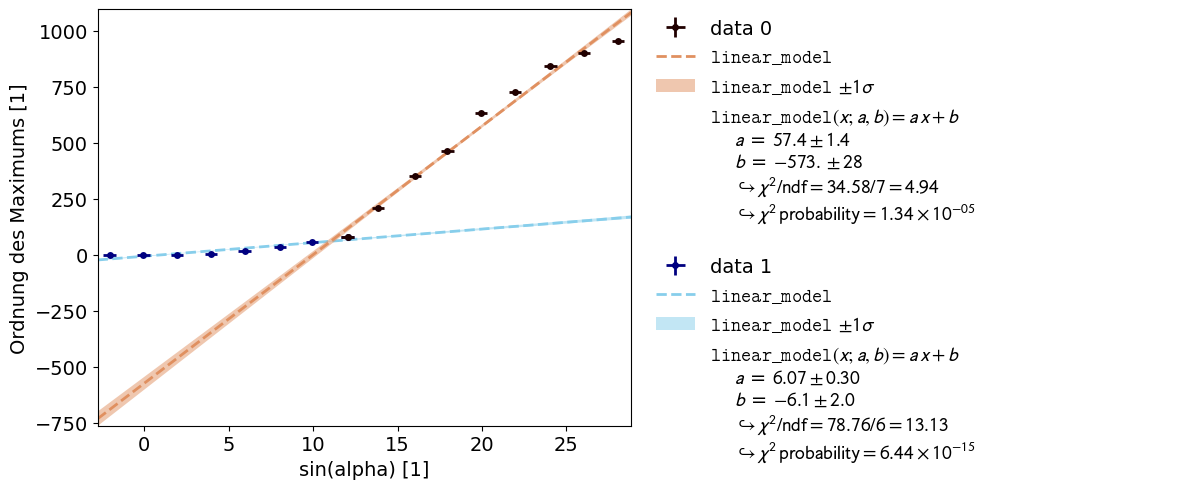

In [6]:
#Strom in mu A

U_kont = u.ufloat(2.06,0.27)



arr = np.array([[0,0], [2.0, 0], [4.0, 0.43], [6.0, 4.25], [8.0, 15.13], [10.1, 33.59], [12.0, 58.08], [14.1, 80.73]])
arr2 = np.array([[14.1, 80.73], [15.9, 208.80], [18.1, 350.95], [20.0, 463.30], [22.0, 633.8], [24.0, 728.6], [26.1, 844.7], [28.1, 903.2], [30.1, 953.6]])


ionisierung_cont = kafe2.XYContainer(arr2[:,0]-U_kont.n,arr2[:,1])
ionisierung_cont.add_error('x',0.1+U_kont.s)
ionisierung_cont.add_error('y',3)

ionisierung_fit = kafe2.Fit(ionisierung_cont)
ionisierung_fit.do_fit()

ionisierung2_cont = kafe2.XYContainer(arr[:,0]-U_kont.n,arr[:,1])
ionisierung2_cont.add_error('x',0.1+U_kont.s)
ionisierung2_cont.add_error('y',3)


ionisierung2_fit = kafe2.Fit(ionisierung2_cont)
ionisierung2_fit.do_fit()

ionisierung_plot = kafe2.Plot([ionisierung_fit, ionisierung2_fit])
ionisierung_plot.y_label = 'Ordnung des Maximums [1]'
ionisierung_plot.x_label = 'sin(alpha) [1]'
ionisierung_plot.plot()

plt.show();


In [10]:

a = u.ufloat(ionisierung_fit.parameter_values[0], ionisierung_fit.parameter_errors[0])
b = u.ufloat(ionisierung_fit.parameter_values[1], ionisierung_fit.parameter_errors[1])
c = u.ufloat(ionisierung2_fit.parameter_values[0], ionisierung2_fit.parameter_errors[0])
d = u.ufloat(ionisierung2_fit.parameter_values[1], ionisierung2_fit.parameter_errors[1])

Uion = (b-d)/(c-a)

Uion, Uion.n-Uion.s

(11.043713880180414+/-0.6332337298964372, 10.410480150283977)

Im Vergleich zum Literaturwert von $10.437504\pm0.000006\,eV$ [Quelle](https://physics.nist.gov/cgi-bin/ASD/ie.pl?spectra=mercury&units=1&e_out=0&unc_out=1&at_num_out=1&el_name_out=1&ion_charge_out=1&biblio=1) [Aufgerufen am 02.07.2024 10.44 Uhr] liegt der Ermittelte Wert $U_{\rm{ion}}=11.04\pm0.633\,V$ etwas zu hoch jedoch noch im Bereich der Unsicherheit.


## Aufgabe 4: Bestimmung der mittleren Energie für die Anregung von $\mathrm{Ne}$ durch Elektronenstoß

**Hinweise zu Aufgabe 4 finden in der Datei [Hinweise-Versuchsdurchfuehrung.md](https://gitlab.kit.edu/kit/etp-lehre/p2-praktikum/students/-/blob/main/Franck_Hertz_Versuch/doc/Hinweise-Versuchsdurchfuehrung.md).**

Bestimmen Sie die mittlere Energie für die vorherrschenden Anregungen von $\mathrm{Ne}$ durch Elektronenstoß. Gehen Sie dabei analog zu **Aufgabe 2.1** vor. 

---

In [8]:
pix = unp.uarray([[800,1149], [971,  1306]],7)
divs_pix = unp.uarray([1111,1319,1525,1730],4) 
Udiv= 10
Pixdiv = np.mean((divs_pix-np.roll(divs_pix,1))[1:])
Upix = Udiv/Pixdiv
U_Ne = (pix[:,1] - pix[:,0])*Upix
print(Pixdiv, Upix, U_Ne, np.mean(U_Ne))


206.3+/-1.9 0.0485+/-0.0004 [16.91437802907916+/-0.5040674515771584
 16.235864297253634+/-0.5022006406805409] 16.6+/-0.4


Der Aufbau ähnelt dem in $2.1$ nur muss das Neon nicht mehr beheizt werden da es bei Raumtemperatur bereits Gasförmig ist. Die Parameter wurden nicht übernommen da sie bereits eingestellt waren und im folgenden nicht relevant sind. Die $\frac{I}{U}$-Kennlinie wurde mit einem analogen Oszilloskop aufgezeichnet und fotografiert. Aus der bekannten Rastergröße kann durch Pixelzählen der Abstand zwischen den Minima und Maxima bestimmt werden. Auf die Lage der Maxima wird ein Fehler von $7\,\rm{Pixeln}$ und auf die Lage des vertikalen Gitters $3\,\rm{Pixel}$ angenommen. Die Fehlerfortpflanzung wird mit dem Uncertainties-Package gemacht.

Mit $\frac{U}{div}=10\,V$ und $\frac{pixel}{div}=206.3\pm1.9\,pixel$ folgt $\frac{U}{pixel}=0.0485\pm0.0004\,\frac{V}{pixel}$ und schließlich aus den Maxima $16.9\pm0.5\,eV$ und aus den Minima $16.24\pm0.5\,eV$ für die mittlere Anregungsenergie. Also ergibt sich im Mittel $16.6\pm0.4\,eV$. Der Literaturwert beträgt $\sim 18\,eV$ [Quelle](https://www.physik.fu-berlin.de/physlab/schuelerlabor/skripte/franck-hertz-experiment-quecksilber-neon.pdf) [Aufgerufen am 02.07.2024 12.30 Uhr]. Damit weicht der ermittelte Wert deutlich vom Literaturwert ab welcher nichtmehr im Bereich der Unsicherheit liegt. 
![alt text](paralaxefrei.png)